In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import geopandas as gpd

!pip install seaborn 
import seaborn as sns

# Creating the dataframes 

Let's create dataframes for all of our data throughout the different years and then check the number of columns in all of our datasets to see if they match.

In [4]:
# Creating the dataframes
for year in range(1995, 2024):
    globals()[f"df_{year}"] = pd.read_csv(f"SOF PUF {year}.csv")    # This creates a dataframe for each of our yearly datasets

# Checking the number of columns in some of the dataframes
print(len(df_1995.columns))
print(len(df_2000.columns))
print(len(df_2005.columns))
print(len(df_2010.columns))
print(len(df_2015.columns))
print(len(df_2020.columns))

33
32
31
42
48
45


We can see that the datasets have varying numbers of columns. However, we only want key information including: 
Demographic Data: Age, Sex, Relationship to Household Head
Geographic Data: Region, Province, Urbanity, Country
Education Data: Highest Education Level Attained
Work Data: Occupation Abroad
Remittances: Whether or not there are cash remittances, Total Cash Remittances, Cash Amt Brought Home, Remittances in Kind, Value of In-Kind Remittances

This leaves a total of 14 major columns. Let's view the dataframes, filter out the unecessary columns, and rename them to keep the naming system consistent!

# Region Dictionary

In [5]:
# Region Names 
REGN_code_to_name = {
    "1": "Region I (Ilocos Region)",
    "2": "Region II (Cagayan Valley)",
    "3": "Region III (Central Luzon)",
    "4": "Region IV-A (CALABARZON)",
    "5": "Region V (Bicol Region)",
    "6": "Region VI (Western Visayas)",
    "7": "Region VII (Central Visayas)",
    "8": "Region VIII (Eastern Visayas)",
    "9": "Region IX (Zamboanga Peninsula)",
    "10": "Region X (Northern Mindanao)",
    "11": "Region XI (Davao Region)",
    "12": "Region XII (SOCCSKSARGEN)",
    "13": "Region XIII (Caraga)",
    "14": "Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)",
    "15": "Cordillera Administrative Region (CAR)",
    "16": "National Capital Region (NCR)",
}

# 1995-2023 Data

In [6]:
# This allows us to see all columns
pd.set_option('display.max_columns', None)

# Filtering the 1995 file
df_1995_filtered = df_1995[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCUP1','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()

# Adding a year column
df_1995_filtered['YEAR']=1995

# Renaming columns to match standard
df_1995_filtered.rename(columns={'OCUP1':'OCUP'}, inplace = True) # Renaming for clarity

# Renaming regions using the Region Dictionary
df_1995_filtered['REGN'] = df_1995_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1995_filtered['REGN'] = df_1995_filtered['REGN'].map(REGN_code_to_name)

# Showing dataframe
df_1995_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,36,1,2,Region XIII (Caraga),81,5,X20,1,10000.0,10000.0,2,NaN,1995
1,43,1,2,Region XIII (Caraga),52,6,NaN,1,75000.0,NaN,2,NaN,1995
2,40,1,2,Region XIII (Caraga),26,5,NaN,1,12000.0,NaN,2,NaN,1995
3,36,2,2,Region XIII (Caraga),81,4,NaN,1,16000.0,NaN,2,NaN,1995
4,37,2,6,Region XIII (Caraga),52,3,NaN,2,NaN,NaN,2,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,33,1,1,Cordillera Administrative Region (CAR),57,2,452,2,NaN,NaN,2,NaN,1995
2033,20,1,3,Cordillera Administrative Region (CAR),57,4,NaN,2,NaN,NaN,2,NaN,1995
2034,25,2,3,Cordillera Administrative Region (CAR),57,2,NaN,2,NaN,NaN,1,1200.0,1995
2035,35,1,1,Cordillera Administrative Region (CAR),57,1,959,2,NaN,NaN,2,NaN,1995


In [7]:
# Filtering 1996 data
df_1996_filtered = df_1996[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCUP','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()

# Adding a year column
df_1996_filtered['YEAR']=1996

df_1996_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,25,2,3,1,39,5,541,1,1500.0,NaN,2,NaN,1996
1,38,2,3,1,15,4,541,1,500.0,NaN,2,NaN,1996
2,44,2,6,1,96,2,NaN,2,NaN,NaN,2,NaN,1996
3,55,1,6,1,96,1,NaN,2,NaN,NaN,2,NaN,1996
4,39,2,2,1,82,6,541,2,NaN,NaN,2,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,46,2,2,16,33,6,322,2,NaN,NaN,2,NaN,1996
2254,23,1,3,16,26,6,NaN,1,23000.0,NaN,2,NaN,1996
2255,39,2,3,16,89,6,776,2,NaN,NaN,1,1000.0,1996
2256,32,2,3,16,80,6,66,2,NaN,NaN,1,2000.0,1996


In [8]:
# Filtering 1997 data
df_1997_filtered = df_1997[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCUP','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()
# Adding a year column
df_1997_filtered['YEAR']=1997

df_1997_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,21,2,3,1,89,6,451,1,23000.0,NaN,2,NaN,1997
1,27,2,3,1,18,6,541,1,10200.0,NaN,2,NaN,1997
2,38,1,4,1,39,5,541,2,NaN,26500.0,2,NaN,1997
3,35,2,3,1,39,6,541,2,NaN,48000.0,1,18500.0,1997
4,35,2,3,1,39,2,541,1,11500.0,NaN,2,NaN,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,28,2,3,16,94,4,541,2,NaN,NaN,2,NaN,1997
2821,36,2,3,16,50,4,949,1,5500.0,NaN,2,NaN,1997
2822,27,2,3,16,39,5,541,1,26000.0,NaN,2,NaN,1997
2823,23,2,3,16,52,3,172,1,18000.0,NaN,1,30000.0,1997


In [9]:
# Filtering 1998 data
df_1998_filtered = df_1998[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCUP','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()
# Adding a year column
df_1998_filtered['YEAR']=1998

df_1998_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,47,2,2,1,51,7,541,1.0,82000.0,NaN,2.0,NaN,1998
1,22,1,3,1,51,7,500,1.0,NaN,NaN,2.0,NaN,1998
2,21,2,3,1,39,6,541,1.0,12000.0,55000.0,1.0,9000.0,1998
3,40,1,2,1,81,3,700,1.0,53000.0,NaN,2.0,NaN,1998
4,29,2,2,1,39,2,541,1.0,7500.0,35000.0,1.0,1500.0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,49,2,2,16,1,1,NaN,2.0,NaN,50000.0,2.0,NaN,1998
3300,36,2,6,16,39,7,541,1.0,29000.0,NaN,2.0,NaN,1998
3301,27,1,3,16,52,7,981,1.0,60000.0,NaN,2.0,NaN,1998
3302,29,1,3,16,81,5,999,1.0,8400.0,NaN,2.0,NaN,1998


In [10]:
# Filtering 1999 data
df_1999
df_1999_filtered = df_1999[['AGE','SEX','REL','REGN','CTRY','GRADE',
                            'OCUP','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()
# Adding a year column
df_1999_filtered['YEAR']=1999

# Renaming the columns to match standard
df_1999_filtered.rename(columns={'GRADE':'HGRADE'}, inplace = True) 

# Showing the data
df_1999_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,27,2,3,1,39,6,541,2.0,NaN,NaN,2.0,NaN,1999
1,45,2,2,1,39,3,541,1.0,20000.0,86000.0,1.0,27200.0,1999
2,35,2,4,1,46,7,541,2.0,NaN,NaN,2.0,NaN,1999
3,42,1,6,1,52,7,029,1.0,100000.0,100000.0,1.0,6500.0,1999
4,35,2,4,1,46,7,541,2.0,NaN,NaN,2.0,NaN,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,46,1,2,16,81,6,846,1.0,96000.0,NaN,2.0,NaN,1999
2180,25,1,3,16,51,5,949,1.0,31000.0,NaN,1.0,5000.0,1999
2181,38,1,1,16,94,7,700,1.0,35000.0,15000.0,1.0,10000.0,1999
2182,34,1,1,16,81,7,855,1.0,10000.0,NaN,2.0,NaN,1999


In [11]:
# Filtering 2000 data
df_2000
df_2000_filtered = df_2000[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCCUP','CASHREM','CASHAMT','CASHHOME','INKIND','KINDAMT']].copy()
# Adding a year column
df_2000_filtered['YEAR']=2000

# Renaming the columns to match the standard 
df_2000_filtered.rename(columns={'OCCUP':'OCUP'}, inplace = True) # Renaming for clarity

# Showing the data
df_2000_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,23,1,3,01,089,7,842,1,060000,,1,001000,2000
1,21,2,4,01,039,4,541,1,003500,115000,1,025000,2000
2,26,2,3,01,039,7,541,1,036000,,2,,2000
3,40,2,2,01,039,6,541,1,010000,,2,,2000
4,34,2,3,01,039,6,389,1,060000,,2,,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,26,2,3,16,052,4,171,1,040000,,1,003800,2000
3339,21,2,3,16,052,6,171,1,010000,,2,,2000
3340,28,2,3,16,089,7,541,1,135000,,2,,2000
3341,30,1,3,16,081,7,066,1,028000,,2,,2000


In [12]:
# Filtering 2001 data
df_2001_filtered = df_2001[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCCUP','CASHREM','CASHAMT','CASHHOME','KINDREM','KINDAMT']].copy()
# Adding a year column
df_2001_filtered['YEAR']=2001

# Renaming to match standard
df_2001_filtered.rename(columns={'KINDREM':'INKIND'}, inplace = True) 
df_2001_filtered.rename(columns={'OCCUP':'OCUP'}, inplace = True) 

# Showing dataframe
df_2001_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,38,2,2,1,39,7.0,913.0,1,20000.0,20000.0,1,1300.0,2001
1,59,1,1,1,86,4.0,913.0,1,30000.0,NaN,1,5500.0,2001
2,25,1,4,1,89,6.0,823.0,1,19500.0,NaN,2,NaN,2001
3,31,1,3,1,96,7.0,NaN,2,NaN,NaN,2,NaN,2001
4,37,2,3,1,39,6.0,913.0,1,45000.0,NaN,1,24000.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,49,1,2,16,81,6.0,712.0,1,119000.0,NaN,2,NaN,2001
3530,66,2,1,16,96,7.0,513.0,1,20000.0,50000.0,1,36000.0,2001
3531,41,1,1,16,10,6.0,724.0,1,55500.0,NaN,2,NaN,2001
3532,28,1,3,16,80,3.0,832.0,1,10000.0,NaN,2,NaN,2001


In [13]:
# Filtering 2002 data
df_2002_filtered = df_2002[['AGE','SEX','REL','REGN','CTRY','HGRADE',
                            'OCCUP','CASHREM','CASHAMT','CASHHOME','KINDREM','KINDAMT']].copy()
# Adding a year column
df_2002_filtered['YEAR']=2002

# Renaming to match the standard
df_2002_filtered.rename(columns={'OCCUP':'OCUP','KINDREM':'INKIND'}, inplace = True) 

# Showing the data
df_2002_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,30,2,3,1,94,4.0,913.0,2,NaN,NaN,2,NaN,2002
1,37,2,2,1,94,3.0,913.0,2,NaN,NaN,2,NaN,2002
2,28,1,3,1,59,7.0,834.0,1,34000.0,NaN,2,NaN,2002
3,42,1,3,1,47,7.0,834.0,2,NaN,NaN,2,NaN,2002
4,45,2,6,1,39,7.0,913.0,1,15000.0,162000.0,2,NaN,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,32,2,3,16,54,6.0,913.0,1,22000.0,NaN,2,NaN,2002
3411,46,1,3,16,81,4.0,721.0,1,10000.0,NaN,2,NaN,2002
3412,48,2,2,16,96,3.0,513.0,1,66000.0,NaN,2,NaN,2002
3413,32,2,3,16,103,7.0,913.0,1,26000.0,NaN,1,5000.0,2002


In [14]:
# Filtering 2003 data
df_2003_filtered = df_2003[['SAGE','SSEX','SREL','W_REGN','CTRY','HGRADE',
                            'OCCUP','CASHREM','CASHAMT','CASHHOME','KINDREM','KINDAMT']].copy()
# Adding a year column
df_2003_filtered['YEAR']=2003

# Renaming the columns to match the standard
df_2003_filtered.rename(columns={'SAGE':'AGE','SSEX':'SEX','SREL':'REL','W_REGN':'REGN',
                                 'OCCUP':'OCUP','KINDREM':'INKIND'}, inplace = True) 

# Showing the data
df_2003_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,26,1,3,1,47,7.0,9151.0,2,NaN,30000.0,2,NaN,2003
1,32,2,3,1,39,3.0,9131.0,1,45000.0,NaN,2,NaN,2003
2,23,1,3,1,96,3.0,5220.0,1,6000.0,NaN,1,400.0,2003
3,33,2,3,1,39,4.0,9131.0,1,9000.0,NaN,2,NaN,2003
4,29,2,3,1,39,7.0,5131.0,1,15000.0,NaN,2,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,23,2,6,42,39,7.0,9131.0,2,NaN,NaN,2,NaN,2003
2884,35,1,3,42,15,6.0,8321.0,1,8000.0,NaN,2,NaN,2003
2885,36,1,2,42,57,5.0,7231.0,1,180000.0,NaN,2,NaN,2003
2886,38,1,6,42,35,6.0,7231.0,1,16000.0,100000.0,2,NaN,2003


In [15]:
# Filtering 2004 data
df_2004_filtered = df_2004[['PQ4_AGE','PQ3_SEX','PQ2_REL','PREG','PQ11_CTRY','PQ8_HGRADE',
                            'PQ14_OCCUP1','PQ19_CASHREM','PQ20_CASHAMT','PQ23_CASHHOME','PQ24_INKIND','PQ25_KINDAMT']].copy()
# Adding a year column
df_2004_filtered['YEAR']=2004

# Renaming the columns to match the standard
df_2004_filtered.rename(columns={'PQ4_AGE':'AGE','PQ3_SEX':'SEX','PQ2_REL':'REL','PREG':'REGN','PQ11_CTRY':'CTRY',
                                 'PQ8_HGRADE':'HGRADE','PQ14_OCCUP1':'OCUP','PQ19_CASHREM':'CASHREM','PQ20_CASHAMT':'CASHAMT',
                                 'PQ23_CASHHOME':'CASHHOME','PQ24_INKIND':'INKIND','PQ25_KINDAMT':'KINDAMT'}, inplace = True) 

# Showing the data
df_2004_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,30,2,2,1,213,5,91,2,,,2,,2004
1,35,2,2,1,213,65,22,1,005000,,2,,2004
2,38,2,3,1,211,4,91,1,003000,,2,,2004
3,37,2,2,1,211,4,91,1,008000,030000,2,,2004
4,38,2,5,1,233,5,91,1,030000,,1,002500,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,20,2,3,42,214,4,91,1,012000,,2,,2004
3520,36,2,2,42,214,2,91,1,110000,165000,2,,2004
3521,28,2,3,42,235,5,34,2,,150000,1,105000,2004
3522,42,1,1,42,400,4,83,1,180000,,1,013000,2004


In [16]:
# Filtering 2005 data
df_2005_filtered = df_2005[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE',
                            'Q14_OCCUP1','Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME','Q24_INKIND','Q25_KINDAMT']].copy()
# Adding a year column
df_2005_filtered['YEAR']=2005

# Renaming columns to match the standard
df_2005_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q11_CTRY':'CTRY','Q8_HGRADE':'HGRADE','Q14_OCCUP1':'OCUP','Q19_CASHREM':'CASHREM',
                                 'Q20_CASHAMT':'CASHAMT','Q23_CASHHOME':'CASHHOME','Q24_INKIND':'INKIND','Q25_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2005_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,31,2,2,1,213,5,9141,1,033000,120000,2,,2005
1,28,2,3,1,213,65,9322,1,015000,,2,,2005
2,27,2,8,1,222,5,9131,1,007500,,2,,2005
3,36,2,2,1,213,65,2231,1,040000,,2,,2005
4,39,2,3,1,211,1,9131,1,025000,,2,,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,38,2,2,42,211,5,9131,1,015000,,2,,2005
3648,33,2,3,42,233,65,3222,1,020000,,2,,2005
3649,25,2,3,42,213,63,5123,2,,,2,,2005
3650,37,2,2,42,223,4,9131,1,030000,,2,,2005


In [17]:
# Filtering 2006 data
df_2006_filtered = df_2006[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE',
                            'Q14_OCCUP1','Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME','Q24_INKIND','Q25_KINDAMT']].copy()
# Adding a year column
df_2006_filtered['YEAR']=2006

# Renaming columns to match the standard
df_2006_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q14_OCCUP1':'OCUP','Q19_CASHREM':'CASHREM','Q20_CASHAMT':'CASHAMT',
                                 'Q23_CASHHOME':'CASHHOME','Q24_INKIND':'INKIND','Q25_KINDAMT':'KINDAMT'}, inplace = True) 
# Show dataframe
df_2006_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,68,2,2,1,500,2,,2,,,2,,2006
1,39,2,2,1,211,4,9131,2,,,2,,2006
2,31,1,5,1,214,4,8122,1,046000,,2,,2006
3,22,2,3,1,234,5,9131,2,,,2,,2006
4,29,2,2,1,235,4,9131,2,,,2,,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,26,2,3,42,213,63,5123,1,090000,,2,,2006
4213,51,1,1,42,500,5,7231,2,,,2,,2006
4214,46,2,2,42,500,65,,2,,,2,,2006
4215,28,1,5,42,400,68,7233,1,900000,,1,008500,2006


In [18]:
# Filtering 2007 data
df_2007_filtered = df_2007[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE',
                            'RQ14_OCCUP1','RQ19_CASHREM','RQ20_CASHAMT','RQ23_CASHHOME','RQ24_INKIND','RQ25_KINDAMT']].copy()
# Adding a year column
df_2007_filtered['YEAR']=2007

# Renaming columns to match the standard
df_2007_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ14_OCCUP1':'OCUP','RQ19_CASHREM':'CASHREM','RQ20_CASHAMT':'CASHAMT',
                                 'RQ23_CASHHOME':'CASHHOME','RQ24_INKIND':'INKIND','RQ25_KINDAMT':'KINDAMT'}, inplace = True) 
# Show dataframe
df_2007_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,36,2,3,1,233,5.0,323.0,1,30000.0,NaN,2,NaN,2007
1,52,2,8,1,400,5.0,913.0,1,45000.0,NaN,2,NaN,2007
2,64,2,7,1,400,65.0,223.0,1,42000.0,0.0,1,19000.0,2007
3,40,2,2,1,211,4.0,913.0,2,NaN,NaN,2,NaN,2007
4,40,2,2,1,211,4.0,913.0,2,NaN,NaN,2,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,27,1,3,42,234,65.0,214.0,1,210000.0,NaN,2,NaN,2007
4313,26,2,3,42,211,3.0,913.0,1,25000.0,NaN,2,NaN,2007
4314,42,1,1,42,400,65.0,215.0,1,54000.0,NaN,2,NaN,2007
4315,32,1,1,42,100,65.0,314.0,1,59400.0,NaN,2,NaN,2007


In [19]:
# Filtering 2008 data
df_2008_filtered = df_2008[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE',
                            'RQ14_OCCUP1','RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME','RQ25_INKIND','RQ26_KINDAMT']].copy()
# Adding a year column
df_2008_filtered['YEAR']=2008

# Renaming columns to match the standard
df_2008_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ14_OCCUP1':'OCUP','RQ19_CASHREM':'CASHREM','RQ20_CASHAMT':'CASHAMT',
                                 'RQ24_CASHHOME':'CASHHOME','RQ25_INKIND':'INKIND','RQ26_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2008_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,31,2,2,1,211,4,913.0,1,18500.0,NaN,1,3000.0,2008
1,27,2,5,1,213,4,743.0,1,10000.0,NaN,2,NaN,2008
2,37,2,2,1,213,4,913.0,1,6000.0,NaN,2,NaN,2008
3,37,2,3,1,211,4,913.0,1,48000.0,NaN,2,NaN,2008
4,45,1,5,1,500,5,913.0,1,58800.0,NaN,2,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,41,2,5,42,211,3,513.0,1,3000.0,NaN,2,NaN,2008
4922,43,1,1,42,300,68,834.0,1,75000.0,NaN,2,NaN,2008
4923,35,2,2,42,233,61,913.0,1,42000.0,NaN,2,NaN,2008
4924,24,2,3,42,234,67,422.0,2,NaN,NaN,1,19000.0,2008


In [20]:
# Filtering 2009 data
df_2009_filtered = df_2009[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE',
                            'RQ14_OCCUP1','RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME','RQ25_INKIND','RQ26_KINDAMT']].copy()
# Adding a year column
df_2009_filtered['YEAR']=2009

# Renaming columns to match the standard
df_2009_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ14_OCCUP1':'OCUP','RQ19_CASHREM':'CASHREM','RQ20_CASHAMT':'CASHAMT',
                                 'RQ24_CASHHOME':'CASHHOME','RQ25_INKIND':'INKIND','RQ26_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2009_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,32,2,2,1,211,4,913,2,,,2,,2009
1,28,2,2,1,211,4,913,2,,,2,,2009
2,44,2,1,1,234,4,913,1,0060000,,2,,2009
3,40,2,4,1,211,4,913,1,0055000,,2,,2009
4,24,2,5,1,214,65,913,1,0020000,,2,,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,47,1,5,42,500,5,741,1,0035000,0141000,1,0020000,2009
5053,26,1,3,42,400,68,821,2,,0035000,2,,2009
5054,36,2,2,42,500,61,913,1,0024000,,2,,2009
5055,25,2,3,42,234,68,422,1,0070000,,2,,2009


In [21]:
# Filtering 2010 data
df_2010_filtered = df_2010[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE',
                            'RQ14_OCCUP1','RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME','RQ25_INKIND','RQ26_KINDAMT']].copy()
# Adding a year column
df_2010_filtered['YEAR']=2010

# Renaming columns to match the standard
df_2010_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ14_OCCUP1':'OCUP','RQ19_CASHREM':'CASHREM','RQ20_CASHAMT':'CASHAMT',
                                 'RQ24_CASHHOME':'CASHHOME','RQ25_INKIND':'INKIND','RQ26_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2010_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,30,2,2,1,222,4,913.0,1,16000.0,NaN,2,NaN,2010
1,54,2,1,1,234,5,913.0,1,12000.0,25000.0,1,6000.0,2010
2,64,2,4,1,211,2,913.0,1,2000.0,10000.0,2,NaN,2010
3,28,1,3,1,213,5,825.0,2,NaN,NaN,2,NaN,2010
4,32,2,2,1,211,61,913.0,1,5000.0,NaN,2,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,22,1,3,42,234,68,834.0,2,NaN,100000.0,2,NaN,2010
4840,30,2,3,42,500,61,512.0,1,5000.0,NaN,2,NaN,2010
4841,39,2,3,42,500,65,223.0,2,NaN,50000.0,2,NaN,2010
4842,48,1,5,42,500,5,149.0,1,45000.0,225000.0,1,10000.0,2010


In [22]:
# Filtering 2011 data
df_2011_filtered = df_2011[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE',
                            'Q15OCC','Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME','Q27_INKIND','Q28_KINDAMT']].copy()
# Adding a year column
df_2011_filtered['YEAR']=2011

# Renaming columns to match the standard
df_2011_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY','Q8_HGRADE':'HGRADE',
                                 'Q15OCC':'OCUP','Q21_CASHREM':'CASHREM','Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME',
                                 'Q27_INKIND':'INKIND','Q28_KINDAMT':'KINDAMT'}, inplace = True) 
# Show dataframe
df_2011_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,38,2,2,1,94,5,913,2,NaN,NaN,2,NaN,2011
1,30,1,3,1,81,65,215,1,80000.0,186000.0,2,NaN,2011
2,31,2,3,1,39,5,913,1,13000.0,NaN,2,NaN,2011
3,33,2,3,1,82,4,913,1,12000.0,15000.0,1,3000.0,2011
4,30,2,3,1,39,4,913,1,4000.0,100000.0,1,2000.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,39,2,3,42,51,5,913,1,30000.0,NaN,2,NaN,2011
4192,35,2,2,42,54,66,913,1,22000.0,NaN,2,NaN,2011
4193,29,2,3,42,51,61,515,1,14000.0,NaN,2,NaN,2011
4194,32,2,3,42,103,4,913,1,61000.0,NaN,2,NaN,2011


In [23]:
# Filtering 2012 data
df_2012_filtered = df_2012[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE',
                            'Q15OCCUP','Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME','Q27_INKIND','Q28_KINDAMT']].copy()
# Adding a year column
df_2012_filtered['YEAR']=2012

# Renaming columns to match the standard
df_2012_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q15OCCUP':'OCUP','Q21_CASHREM':'CASHREM','Q22_CASHAMT':'CASHAMT',
                                 'Q26_CASHHOME':'CASHHOME','Q27_INKIND':'INKIND','Q28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2012_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,26,2,3,1,82,67,222,2,NaN,NaN,2,NaN,2012
1,32,1,5,1,18,65,741,1,90000.0,NaN,2,NaN,2012
2,39,1,1,1,82,68,512,1,138000.0,NaN,2,NaN,2012
3,26,2,3,1,18,67,223,1,105000.0,100000.0,2,NaN,2012
4,45,2,2,1,39,4,913,1,36000.0,NaN,1,10000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,30,2,3,42,51,61,515,1,8000.0,0.0,2,NaN,2012
4287,33,2,3,42,103,4,913,1,45000.0,NaN,1,3000.0,2012
4288,24,2,3,42,82,4,913,1,28000.0,NaN,2,NaN,2012
4289,39,1,5,42,52,65,215,1,120000.0,184000.0,1,4600.0,2012


In [24]:
# Filtering 2013 data
df_2013_filtered = df_2013[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE',
                            'Q15OCCUP','Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME','Q27_INKIND','Q28_KINDAMT']].copy()
# Adding a year column
df_2013_filtered['YEAR']=2013

# Renaming columns to match the standard
df_2013_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q15OCCUP':'OCUP','Q21_CASHREM':'CASHREM','Q22_CASHAMT':'CASHAMT',
                                 'Q26_CASHHOME':'CASHHOME','Q27_INKIND':'INKIND','Q28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2013_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,32,1,5,1,81,65,215,1,180000.0,NaN,2,NaN,2013
1,27,2,3,1,82,67,313,1,30000.0,100000.0,2,NaN,2013
2,33,1,5,1,47,65,741,1,120000.0,NaN,2,NaN,2013
3,31,1,5,1,51,6,512,1,30000.0,NaN,2,NaN,2013
4,40,1,1,1,32,68,512,1,138000.0,NaN,2,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,55,2,2,42,39,2,913,1,60000.0,40000.0,1,10000.0,2013
4364,30,2,5,42,39,3,913,1,36000.0,NaN,1,4000.0,2013
4365,26,2,3,42,94,68,512,2,NaN,30000.0,1,50000.0,2013
4366,37,1,2,42,52,65,215,1,90000.0,NaN,2,NaN,2013


In [25]:
# Filtering 2014 data
df_2014_filtered = df_2014[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE',
                            'RQ15_OCCUP1','RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME','RQ27_INKIND','RQ28_KINDAMT']].copy()
# Adding a year column
df_2014_filtered['YEAR']=2014

# Renaming columns to match the standard
df_2014_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ15_OCCUP1':'OCUP','RQ21_CASHREM':'CASHREM','RQ22_CASHAMT':'CASHAMT',
                                 'RQ26_CASHHOME':'CASHHOME','RQ27_INKIND':'INKIND','RQ28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2014_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,31,1,3,1,213,67.0,829.0,1,60000.0,NaN,2,NaN,2014
1,43,2,2,1,233,67.0,223.0,1,25000.0,NaN,2,NaN,2014
2,26,1,3,1,233,4.0,832.0,2,NaN,NaN,2,NaN,2014
3,33,2,2,1,235,4.0,913.0,1,8000.0,NaN,2,NaN,2014
4,38,1,5,1,400,68.0,723.0,1,80500.0,NaN,2,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,26,1,3,42,213,64.0,312.0,1,15000.0,NaN,1,10000.0,2014
5353,33,1,3,42,100,6.0,921.0,1,22000.0,NaN,2,NaN,2014
5354,29,1,3,42,233,65.0,724.0,1,20000.0,50000.0,1,92500.0,2014
5355,27,2,3,42,222,63.0,149.0,1,96000.0,0.0,2,NaN,2014


In [26]:
# Filtering 2015 data
df_2015_filtered = df_2015[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE',
                            'RQ15_OCCUP1','RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME','RQ27_INKIND','RQ28_KINDAMT']].copy()
# Adding a year column
df_2015_filtered['YEAR']=2015

# Renaming columns to match the standard
df_2015_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ15_OCCUP1':'OCUP','RQ21_CASHREM':'CASHREM','RQ22_CASHAMT':'CASHAMT',
                                 'RQ26_CASHHOME':'CASHHOME','RQ27_INKIND':'INKIND','RQ28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2015_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,59,2,8,1,500,4,513.0,1,60000.0,NaN,1,7500.0,2015
1,29,1,3,1,213,67,222.0,1,15000.0,50000.0,1,8000.0,2015
2,25,2,3,1,233,67,223.0,2,NaN,60000.0,2,NaN,2015
3,30,1,3,1,234,68,512.0,1,48000.0,NaN,1,8000.0,2015
4,35,1,3,1,214,4,826.0,2,NaN,NaN,2,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,27,1,3,42,213,64,312.0,1,50000.0,NaN,1,15000.0,2015
5436,26,2,2,42,234,4,421.0,2,NaN,NaN,2,NaN,2015
5437,34,1,3,42,600,6,921.0,1,44000.0,NaN,2,NaN,2015
5438,30,1,3,42,233,65,724.0,1,25000.0,NaN,2,NaN,2015


In [27]:
# Filtering 2016 data
df_2016_filtered = df_2016[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE',
                            'RQ15_OCCUP1','RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME','RQ27_INKIND','RQ28_KINDAMT']].copy()
# Adding a year column
df_2016_filtered['YEAR']=2016

# Renaming columns to match the standard
df_2016_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ15_OCCUP1':'OCUP','RQ21_CASHREM':'CASHREM','RQ22_CASHAMT':'CASHAMT',
                                 'RQ26_CASHHOME':'CASHHOME','RQ27_INKIND':'INKIND','RQ28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2016_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,34,2,2,1,222,4.0,911.0,2,NaN,NaN,2,NaN,2016
1,48,1,1,1,233,4.0,711.0,1,58800.0,NaN,2,NaN,2016
2,44,2,2,1,233,4.0,911.0,1,40000.0,NaN,2,NaN,2016
3,26,2,3,1,233,67.0,222.0,1,70000.0,NaN,2,NaN,2016
4,31,1,3,1,234,65.0,832.0,1,55000.0,150000.0,2,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,47,1,1,18,212,65.0,835.0,1,105000.0,NaN,2,NaN,2016
4218,26,2,3,18,231,6.0,911.0,1,24000.0,NaN,2,NaN,2016
4219,26,2,3,18,500,4.0,523.0,1,36000.0,NaN,1,15000.0,2016
4220,61,1,2,18,500,63.0,818.0,1,125000.0,5000.0,2,NaN,2016


In [28]:
# Filtering 2017 data
df_2017_filtered = df_2017[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE',
                            'RQ15_OCCUP1','RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME','RQ27_INKIND','RQ28_KINDAMT']].copy()
# Adding a year column
df_2017_filtered['YEAR']=2017

# Renaming columns to match the standard
df_2017_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ15_OCCUP1':'OCUP','RQ21_CASHREM':'CASHREM','RQ22_CASHAMT':'CASHAMT',
                                 'RQ26_CASHHOME':'CASHHOME','RQ27_INKIND':'INKIND','RQ28_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2017_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,41,2,2,14,233,003,91,1,0046000,,2,,2017
1,36,2,2,14,231,008,91,1,0020000,,2,,2017
2,43,2,2,14,231,862,91,1,0052000,,2,,2017
3,27,2,2,14,211,634,91,1,0060000,,2,,2017
4,39,2,2,14,233,004,91,1,0021000,,1,0008000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,51,2,2,12,231,008,75,1,0028000,,2,,2017
4132,34,2,3,12,233,814,91,2,,,2,,2017
4133,38,1,1,12,233,004,83,1,0036000,,2,,2017
4134,26,2,3,12,231,003,91,2,,,2,,2017


In [29]:
# Filtering 2018 data
df_2018_filtered = df_2018[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2018_filtered['YEAR']=2018

# Renaming columns to match the standard
df_2018_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ9_2DGT':'OCUP','RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT',
                                 'RQ28_CASHHOME':'CASHHOME','RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True) 


# Show dataframe
df_2018_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,31,2,2,14,211,4,91,1,25000,,2,,2018
1,33,2,4,14,234,7,24,1,34000,,2,,2018
2,41,1,1,14,300,7,33,1,180000,,2,,2018
3,37,2,4,14,235,6,92,1,50000,,2,,2018
4,29,2,4,14,233,3,91,1,200000,,2,,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,27,1,3,12,233,7,83,1,32000,,2,,2018
4210,35,2,8,12,233,3,14,1,10000,,2,,2018
4211,26,2,4,12,233,4,52,1,40000,,2,,2018
4212,38,2,8,12,232,2,14,2,,0070000,1,0029000,2018


In [30]:
# Filtering 2019 data
df_2019_filtered = df_2019[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2019_filtered['YEAR']=2019

# Renaming columns to match the standard
df_2019_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ9_2DGT':'OCUP','RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT',
                                 'RQ28_CASHHOME':'CASHHOME','RQ29_INKIND':'INKIND','RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True)

# Show dataframe
df_2019_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,28,1,3,14,212,04,52,1,60000,,1,0020000,2019
1,46,1,1,14,400,09,9,1,200000,,2,,2019
2,56,2,2,14,231,04,51,1,48000,,2,,2019
3,40,2,2,14,222,08,9,1,47000,,2,,2019
4,54,1,1,14,500,04,72,1,240000,,1,0040000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,32,2,2,12,234,10,52,1,67000,,2,,2019
4186,30,1,3,12,233,10,9,1,23000,,2,,2019
4187,22,2,4,12,233,04,9,1,25000,,2,,2019
4188,25,2,4,12,233,02,52,1,45000,,2,,2019


In [31]:
# Filtering 2020 data
df_2020_filtered = df_2020[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2020_filtered['YEAR']=2020

# Renaming columns to match the standard
df_2020_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN',
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ9_2DGT':'OCUP',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME',
                                 'RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2020_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,54,1,4,1,400,04,61,1,60000,,2,,2020
1,54,2,8,1,400,09,09,1,40000,,2,,2020
2,35,2,8,1,400,09,52,1,20000,,2,,2020
3,33,2,8,1,400,10,22,1,40000,,2,,2020
4,28,2,3,1,400,10,22,1,130000,,2,,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,41,1,2,17,300,08,31,1,210000,,2,,2020
4357,42,2,3,17,400,04,09,1,100000,,2,,2020
4358,34,2,3,17,222,04,09,1,15000,,2,,2020
4359,52,2,3,17,500,10,09,1,25000,,1,00009000,2020


In [32]:
# Filtering 2021 data
df_2021_filtered = df_2021[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2021_filtered['YEAR']=2021

# Renaming columns to match the standard
df_2021_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN',
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ9_2DGT':'OCUP',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME',
                                 'RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2021_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,50,2,2,1,214,10,22,2,,,2,,2021
1,35,1,2,1,400,10,92,1,120000,,2,,2021
2,55,2,2,1,213,8,92,2,,,2,,2021
3,27,1,4,1,500,4,61,1,104000,,2,,2021
4,36,2,3,1,222,4,9,1,12000,,2,,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,38,1,5,17,400,10,61,2,,,2,,2021
4266,34,2,2,17,211,4,61,1,54000,,2,,2021
4267,57,2,1,17,300,8,33,2,,,2,,2021
4268,58,2,3,17,222,10,9,2,,,2,,2021


In [33]:
# Filtering 2022 data
df_2022_filtered = df_2022[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2022_filtered['YEAR']=2022

# Renaming columns to match the standard
df_2022_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN',
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ9_2DGT':'OCUP',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME',
                                 'RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True) 

# Show dataframe
df_2022_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,35,1,8,1,400,08,61,1,45000,,2,,2022
1,48,2,8,1,211,10,14,1,90000,,2,,2022
2,26,2,3,1,500,10,22,1,60000,,2,,2022
3,40,1,4,1,500,09,61,1,40000,0003000,1,00050000,2022
4,40,2,8,1,500,04,92,2,,0005000,2,,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,36,1,3,17,233,04,51,1,30000,,2,,2022
3831,36,1,3,17,500,10,62,1,40000,,2,,2022
3832,40,2,3,17,231,10,52,1,20000,,2,,2022
3833,40,1,2,17,214,10,93,1,180000,,2,,2022


In [34]:
# Filtering 2023 data
df_2023_filtered = df_2023[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ9_2DGT',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME','RQ29_INKIND','RQ30_KINDAMT']].copy()
# Adding a year column
df_2023_filtered['YEAR']=2023

# Renaming columns to match the standard
df_2023_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN', 
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ9_2DGT':'OCUP',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME',
                                 'RQ29_INKIND':'INKIND','RQ30_KINDAMT':'KINDAMT'}, inplace = True) 
# Show dataframe
df_2023_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,65,1,8,1,500,04,61,1,180000,,1,00055000,2023
1,72,2,8,1,500,04,92,2,,,2,,2023
2,30,2,8,1,500,10,22,2,,,2,,2023
3,42,2,3,1,233,04,91,1,20000,0020000,1,00030000,2023
4,43,2,2,1,211,10,92,1,40000,,2,,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,29,2,2,19,233,03,91,1,42000,,2,,2023
4300,38,2,2,19,231,04,52,1,36000,,2,,2023
4301,48,2,2,19,233,04,91,1,26000,,2,,2023
4302,23,2,2,19,233,03,61,1,26500,,1,00017000,2023


# Merging the data
Next, we can merge our dataframes to provide us with one major dataframe we can use for the rest of our analysis.

In [56]:
df_merged = pd.concat([df_1995_filtered, df_1996_filtered, df_1997_filtered, df_1998_filtered, df_1999_filtered,
                       df_2000_filtered, df_2001_filtered, df_2001_filtered, df_2002_filtered, df_2003_filtered,
                       df_2004_filtered, df_2005_filtered, df_2006_filtered, df_2007_filtered, df_2008_filtered, 
                       df_2009_filtered, df_2010_filtered, df_2011_filtered, df_2012_filtered, df_2013_filtered,
                       df_2014_filtered, df_2015_filtered, df_2016_filtered, df_2017_filtered, df_2018_filtered,
                       df_2019_filtered, df_2020_filtered, df_2021_filtered, df_2022_filtered, df_2023_filtered],
                       ignore_index=True)
df_merged

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,36,1,2,Region XIII (Caraga),81,5,X20,1,10000.0,10000.0,2,NaN,1995
1,43,1,2,Region XIII (Caraga),52,6,NaN,1,75000.0,NaN,2,NaN,1995
2,40,1,2,Region XIII (Caraga),26,5,NaN,1,12000.0,NaN,2,NaN,1995
3,36,2,2,Region XIII (Caraga),81,4,NaN,1,16000.0,NaN,2,NaN,1995
4,37,2,6,Region XIII (Caraga),52,3,NaN,2,NaN,NaN,2,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117038,29,2,2,19,233,03,91,1,42000,,2,,2023
117039,38,2,2,19,231,04,52,1,36000,,2,,2023
117040,48,2,2,19,233,04,91,1,26000,,2,,2023
117041,23,2,2,19,233,03,61,1,26500,,1,00017000,2023


# Cleaning the data
Now, we can clean the merged dataframe.

In [36]:
# Checking for NaN values
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in OCUP: {df_merged['OCUP'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")
print(f"NaN Values in CASHHOME: {df_merged['CASHHOME'].isna().sum()}")
print(f"NaN Values in INKIND: {df_merged['INKIND'].isna().sum()}")
print(f"NaN Values in KINDAMT: {df_merged['KINDAMT'].isna().sum()}")

NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in HGRADE: 28
NaN Values in OCUP: 5639
NaN Values in CASHREM: 22
NaN Values in CASHAMT: 18499
NaN Values in CASHHOME: 55739
NaN Values in INKIND: 25
NaN Values in KINDAMT: 55529


Dropping negligible values

In [37]:
# We can drop the rows with NaN values in HGRADE as there are only 28 out of 117,000+ that are missing.
df_merged = df_merged.dropna(subset=['HGRADE'])

# We can also drop the 22 missing values for Cash Remittances
df_merged = df_merged.dropna(subset=['CASHREM'])

df_merged

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,36,1,2,Region XIII (Caraga),81,5,X20,1,10000.0,10000.0,2,NaN,1995
1,43,1,2,Region XIII (Caraga),52,6,NaN,1,75000.0,NaN,2,NaN,1995
2,40,1,2,Region XIII (Caraga),26,5,NaN,1,12000.0,NaN,2,NaN,1995
3,36,2,2,Region XIII (Caraga),81,4,NaN,1,16000.0,NaN,2,NaN,1995
4,37,2,6,Region XIII (Caraga),52,3,NaN,2,NaN,NaN,2,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117038,29,2,2,19,233,03,91,1,42000,,2,,2023
117039,38,2,2,19,231,04,52,1,36000,,2,,2023
117040,48,2,2,19,233,04,91,1,26000,,2,,2023
117041,23,2,2,19,233,03,61,1,26500,,1,00017000,2023


In [38]:
# To know if the missing CASHAMT data is from those who answered 'no' when asked if they give cash remittances
NO_CASHREM = df_merged['CASHREM'].eq(2).sum()
EMPTY_CASHAMT = df_merged[df_merged['CASHREM'] == 2]['CASHAMT'].isna().sum()

print(f"People who said 'No' to cash remittances: {NO_CASHREM}")
print(f"Of them, how many have missing cash amount: {EMPTY_CASHAMT}")

People who said 'No' to cash remittances: 31798
Of them, how many have missing cash amount: 18434


In [39]:
# Checking to see if there is a specific year where 1 and 2 might mean different things
df_merged[df_merged['CASHAMT'].isna()]['YEAR'].value_counts()

YEAR
2001    2478
2014    1621
2008    1465
2015    1437
2010    1413
2007    1277
2002    1136
2016    1130
1998     895
1996     837
2003     798
2013     703
2012     693
1995     647
1997     646
1999     640
2011     633
Name: count, dtype: int64

There doesn't seem to be any abnormal years, so we can likely attribute it to answering error. This error has gone down through time as well. For our purposes, we will assume that those who answered "No" in cash remittances did not send any cash remittances to the Philippines.

In [40]:
# Making CASHAMT = 0 if they answered "No" to Cash Remittances
df_merged.loc[df_merged['CASHREM']==2,'CASHAMT']=0

# Double checking if there are any empty CASHAMT rows
print(f"Empty CASHAMT Rows: {EMPTY_CASHAMT}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")


Empty CASHAMT Rows: 18434
NaN Values in CASHAMT: 15


There are 15 more values with NaN amounts. These may come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.

In [41]:
df_merged[df_merged['CASHAMT'].isna()] ['YEAR'].value_counts()

YEAR
1998    9
1999    5
2003    1
Name: count, dtype: int64

It seems like the remaining NaN values indeed come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.  Let's remove those rows.

In [42]:
# Dropping the remaining NaN rows for CASHAMT
df_merged = df_merged.dropna(subset=['CASHAMT'])
df_merged

,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,CASHHOME,INKIND,KINDAMT,YEAR
0,36,1,2,Region XIII (Caraga),81,5,X20,1,10000.0,10000.0,2,NaN,1995
1,43,1,2,Region XIII (Caraga),52,6,NaN,1,75000.0,NaN,2,NaN,1995
2,40,1,2,Region XIII (Caraga),26,5,NaN,1,12000.0,NaN,2,NaN,1995
3,36,2,2,Region XIII (Caraga),81,4,NaN,1,16000.0,NaN,2,NaN,1995
4,37,2,6,Region XIII (Caraga),52,3,NaN,2,0,NaN,2,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117038,29,2,2,19,233,03,91,1,42000,,2,,2023
117039,38,2,2,19,231,04,52,1,36000,,2,,2023
117040,48,2,2,19,233,04,91,1,26000,,2,,2023
117041,23,2,2,19,233,03,61,1,26500,,1,00017000,2023


Now let's check how much of the NaN values from KINDAMT comes from those who answered 'NO' to INKIND

In [43]:
# To know if the missing KINDAMT data is from those who answered 'no' when asked if they in kind remittances
NO_INKIND = df_merged['INKIND'].eq(2).sum()
EMPTY_KINDAMT = df_merged[df_merged['INKIND'] == 2]['KINDAMT'].isna().sum()

print(f"People who said 'No' to cash remittances: {NO_INKIND}")
print(f"Of them, how many have missing cash amount: {EMPTY_KINDAMT}")

People who said 'No' to cash remittances: 95554
Of them, how many have missing cash amount: 55459


Almost 50% of the data is still missing even for those who said "Yes" to in-kind. So, we can remove the columns for INKIND and KINDAMT as they are not essential to our analysis. We can also remove the CASHHOME column as it is also missing almost 50% of data.

In [44]:
# Removing the INKIND and KINDAMT columns
df_merged.drop(['INKIND','KINDAMT','CASHHOME'],axis=1, inplace=True)
df_merged

C:\Users\Shannen Mari\AppData\Local\Temp\ipykernel_22828\3675050529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(['INKIND','KINDAMT','CASHHOME'],axis=1, inplace=True)


,AGE,SEX,REL,REGN,CTRY,HGRADE,OCUP,CASHREM,CASHAMT,YEAR
0,36,1,2,Region XIII (Caraga),81,5,X20,1,10000.0,1995
1,43,1,2,Region XIII (Caraga),52,6,NaN,1,75000.0,1995
2,40,1,2,Region XIII (Caraga),26,5,NaN,1,12000.0,1995
3,36,2,2,Region XIII (Caraga),81,4,NaN,1,16000.0,1995
4,37,2,6,Region XIII (Caraga),52,3,NaN,2,0,1995
...,...,...,...,...,...,...,...,...,...,...
117038,29,2,2,19,233,03,91,1,42000,2023
117039,38,2,2,19,231,04,52,1,36000,2023
117040,48,2,2,19,233,04,91,1,26000,2023
117041,23,2,2,19,233,03,61,1,26500,2023


In [53]:
# Checking the number of NaN values again
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in OCUP: {df_merged['OCUP'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")

NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in HGRADE: 0
NaN Values in OCUP: 5591
NaN Values in CASHREM: 0
NaN Values in CASHAMT: 0


We've removed a total of 65 out of 117,043 rows, bringing us to 116,978 rows in total. :D

# Using the Shapefiles

In [46]:
# Reading the PH region shapefile
ph_gdf = gpd.read_file('PH_Adm1_Regions.shp.shx')

# Taking a look at the components of the shapefile
print(ph_gdf.columns)
print(ph_gdf.head())


Index(['adm1_psgc', 'adm1_en', 'geo_level', 'len_crs', 'area_crs', 'len_km',
       'area_km2', 'geometry'],
      dtype='object')
   adm1_psgc                     adm1_en geo_level  len_crs     area_crs  \
0  100000000    Region I (Ilocos Region)       Reg  1633812  12319684719   
1  200000000  Region II (Cagayan Valley)       Reg  2071665  26379470627   
2  300000000  Region III (Central Luzon)       Reg  1739730  21317544191   
3  400000000    Region IV-A (CALABARZON)       Reg  3018869  15844672848   
4  500000000     Region V (Bicol Region)       Reg  4916380  17326742058   

   len_km  area_km2                                           geometry  
0    1633   12319.0  MULTIPOLYGON (((285928.399 2055561.259, 285954...  
1    2071   26379.0  MULTIPOLYGON (((390824.572 2333905.124, 390822...  
2    1739   21317.0  MULTIPOLYGON (((418263.08 1822987.298, 418262....  
3    3018   15844.0  MULTIPOLYGON (((425287.448 1559120.357, 425305...  
4    4916   17326.0  MULTIPOLYGON (((498716.968

From here, we can see that the region name is under the 'adm1_en' column. We can rename that for readability.

In [47]:
# Renaming region column
ph_gdf = ph_gdf.rename(columns={"adm1_en": "REGN"})

# Checking if the region column has successfully been renamed:
print(ph_gdf.columns)

Index(['adm1_psgc', 'REGN', 'geo_level', 'len_crs', 'area_crs', 'len_km',
       'area_km2', 'geometry'],
      dtype='object')


# Sample Chloropleth Map with 1995 Data

In [54]:
# Since there are no missing values, we can directly merge the shapefiles with the dataframe. Let's test it with the 1995 data.
region_counts = df_1995_filtered['REGN'].value_counts().reset_index() # Counts the number of OFWs per region and turns it into a dataframe

# Take a look at the dataframe
region_counts


,REGN,count
0,Region XIII (Caraga),401
1,Region IV-A (CALABARZON),396
2,Region III (Central Luzon),296
3,Region I (Ilocos Region),238
4,Region VI (Western Visayas),155
5,Region II (Cagayan Valley),100
6,Region V (Bicol Region),72
7,Region VII (Central Visayas),62
8,Region XI (Davao Region),62
9,Bangsamoro Autonomous Region in Muslim Mindana...,57


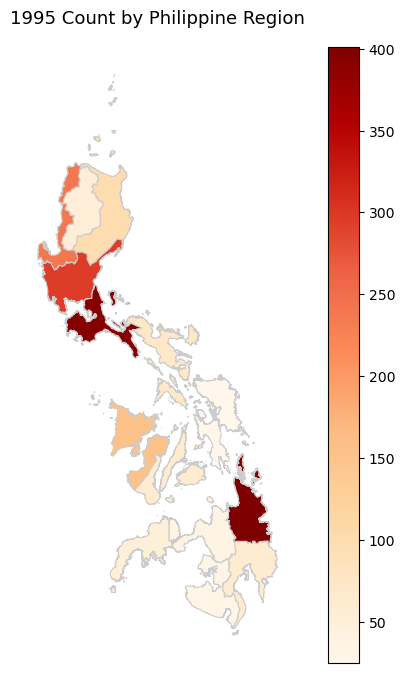

In [57]:
# Merge shapefile with OFW counts
df_heatmap_1995 = ph_gdf.merge(region_counts, on='REGN', how='left')

# Creating the chloropleth map for 1995
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_1995.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("1995 Count by Philippine Region", fontsize=13)
plt.axis('off')

plt.show()